In [ ]:
#10173285 邱柏凱
import requests
from bs4 import BeautifulSoup

title = []

url="https://www.ptt.cc/bbs/car/index.html"

for page in range(10):#設定要爬取的頁數

    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    data = soup.select('.title a')
    paging = soup.select('.btn-group.btn-group-paging a')
    last_url = "https://www.ptt.cc" + paging[1]['href']
    url = last_url
    for item in data:
        title.append(item.text)
        print(title)

['Re: [討論] 交岔路口十公尺內違停 檢舉失敗']
['Re: [討論] 交岔路口十公尺內違停 檢舉失敗', '[新聞] 續航預期 300-400 公里！80 萬有找 Tes']
['Re: [討論] 交岔路口十公尺內違停 檢舉失敗', '[新聞] 續航預期 300-400 公里！80 萬有找 Tes', '[問題] 隧道內發生車禍(EX:雪隧)的處理步驟']
['Re: [討論] 交岔路口十公尺內違停 檢舉失敗', '[新聞] 續航預期 300-400 公里！80 萬有找 Tes', '[問題] 隧道內發生車禍(EX:雪隧)的處理步驟', '[問題] 清完節氣門後怠速引擎抖動較為明顯']
['Re: [討論] 交岔路口十公尺內違停 檢舉失敗', '[新聞] 續航預期 300-400 公里！80 萬有找 Tes', '[問題] 隧道內發生車禍(EX:雪隧)的處理步驟', '[問題] 清完節氣門後怠速引擎抖動較為明顯', '[問題] 天氣冷加油站洗車多給阿弟50元有違法嗎']
['Re: [討論] 交岔路口十公尺內違停 檢舉失敗', '[新聞] 續航預期 300-400 公里！80 萬有找 Tes', '[問題] 隧道內發生車禍(EX:雪隧)的處理步驟', '[問題] 清完節氣門後怠速引擎抖動較為明顯', '[問題] 天氣冷加油站洗車多給阿弟50元有違法嗎', '[問題] 車門排水孔的水塞要拔起來嗎?']
['Re: [討論] 交岔路口十公尺內違停 檢舉失敗', '[新聞] 續航預期 300-400 公里！80 萬有找 Tes', '[問題] 隧道內發生車禍(EX:雪隧)的處理步驟', '[問題] 清完節氣門後怠速引擎抖動較為明顯', '[問題] 天氣冷加油站洗車多給阿弟50元有違法嗎', '[問題] 車門排水孔的水塞要拔起來嗎?', '[新聞] 清境2停車場開始全天收費無上限 久占「車']
['Re: [討論] 交岔路口十公尺內違停 檢舉失敗', '[新聞] 續航預期 300-400 公里！80 萬有找 Tes', '[問題] 隧道內發生車禍(EX:雪隧)的處理步驟', '[問題] 清完節氣門後怠速引擎抖動較為明顯', '[問題] 天氣冷加油站洗車多給阿弟50元有違法嗎', '[問題] 車門排水孔的水塞要拔起來嗎?', '[新聞] 清境2停車場開始全天收費無上

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

colorgroup1 = ['#427f8f','#4a8fa1','#559db0','#66a7b8','#77b1c0','#89bbc8','#9ac5d0','#bdd9e0','#cee3e8']
#藍色漸層
colorgroup2 = ['#cd0003','#e60003','#ff0004','#ff1a1d','#ff3436','#ff4d4f','#ff6768','#ff8181','#ff9a9b']
#紅色漸層

#決定所欲查詢比對之聲量標的
car_brand = ['benz','bmw','toyota','mazda','ford','subaru','volvo','volkswagen','skoda','hyndai','honda','mg','mitsubishi',
               'audi']
car_brand_upper = []

for i in car_brand:
    car_brand_upper.append(i.upper())

car_brand_first_upper = []
for x in car_brand:
    car_brand_first_upper.append(x.capitalize())

brand_count_lower = []
for name in car_brand:
    count=0
    for mentioned in title:
        if name in mentioned:
            count = count + 1
    brand_count_lower.append(count)


brand_count_first_upper = []
for name in car_brand_first_upper:
    count = 0
    for mentioned in title:
        if name in mentioned:
            count = count +1
    brand_count_first_upper.append(count)

brand_count_upper = []
for name in car_brand_upper:
    count = 0
    for mentioned in title:
        if name in mentioned:
            count = count + 1
    brand_count_upper.append(count)

print("lower:", brand_count_lower)
print("upper:", brand_count_upper)
print("first:", brand_count_first_upper)

total = []

for each_data in range(0, len(brand_count_lower)):
    total.append(brand_count_lower[each_data]+brand_count_upper[each_data]+brand_count_first_upper[each_data])
print("Total:", total)

lower: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
upper: [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0]
first: [0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1]
Total: [0, 4, 3, 2, 2, 0, 0, 0, 0, 0, 2, 3, 0, 1]


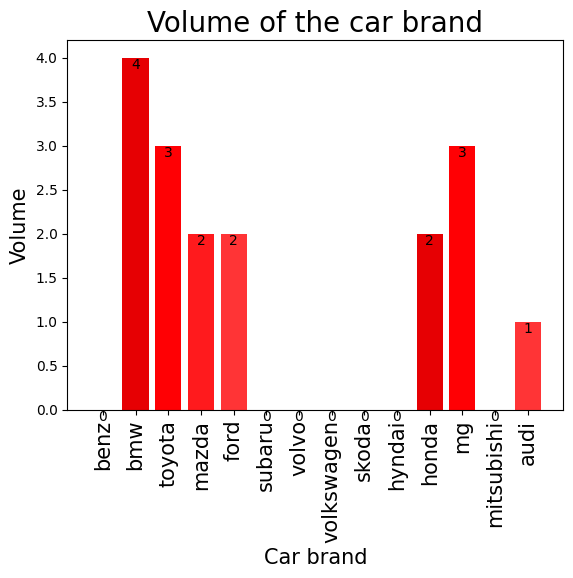

In [11]:
plt.bar(car_brand, total, color = colorgroup2)

plt.xticks(fontsize=15,rotation=90)

for index, data in enumerate(total):
    plt.text(x=index, y=data, s=data, verticalalignment="top", horizontalalignment="center")

plt.xlabel('Car brand', fontsize=15)
plt.ylabel('Volume', fontsize=15)
plt.title('Volume of the car brand', fontsize=20)
plt.show()#將資料視覺化


In [ ]:
%pip install pyecharts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 7.2 MB/s eta 0:00:00


In [9]:
from pyecharts.charts import *
from pyecharts.components import Table
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode

x_data = car_brand
y_data = total

bar = (Bar()
        .add_xaxis(x_data)
        .add_yaxis('',y_data)
      )

bar.render_notebook()#生成較美觀的圖表